In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import plotly.express as px

In [2]:
#bulk analysis

In [6]:
# Load the csv file of the clean data
df = pd.read_csv('data\\processed\\bulk_sales_cleaned.csv')
dfr = pd.read_csv('data\\processed\\retail_cleaned.csv')

In [8]:
df.head(20)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489438,20711,JUMBO BAG TOYS,60,2009-12-01 09:24:00,1.30,18102,United Kingdom
1,489438,84031A,CHARLIE+LOLA RED HOT WATER BOTTLE,56,2009-12-01 09:24:00,3.00,18102,United Kingdom
2,489438,84031B,CHARLIE LOLA BLUE HOT WATER BOTTLE,56,2009-12-01 09:24:00,3.00,18102,United Kingdom
3,489438,84032A,CHARLIE+LOLA PINK HOT WATER BOTTLE,60,2009-12-01 09:24:00,1.90,18102,United Kingdom
4,489438,84032B,CHARLIE + LOLA RED HOT WATER BOTTLE,56,2009-12-01 09:24:00,1.90,18102,United Kingdom
5,489438,84519A,TOMATO CHARLIE+LOLA COASTER SET,56,2009-12-01 09:24:00,2.15,18102,United Kingdom
6,489438,84519B,CARROT CHARLIE+LOLA COASTER SET,60,2009-12-01 09:24:00,2.40,18102,United Kingdom
7,489438,85132A,CHARLIE + LOLA BISCUITS TINS,60,2009-12-01 09:24:00,6.38,18102,United Kingdom
8,489438,85132C,CHARLIE AND LOLA FIGURES TINS,60,2009-12-01 09:24:00,6.40,18102,United Kingdom
9,489438,85183A,CHARLIE & LOLA WASTEPAPER BIN BLUE,60,2009-12-01 09:24:00,2.40,18102,United Kingdom


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24350 entries, 0 to 24349
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Invoice      24350 non-null  int64  
 1   StockCode    24350 non-null  object 
 2   Description  24350 non-null  object 
 3   Quantity     24350 non-null  int64  
 4   InvoiceDate  24350 non-null  object 
 5   Price        24350 non-null  float64
 6   Customer ID  24350 non-null  object 
 7   Country      24350 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.5+ MB


In [12]:
#bulk analysis

In [14]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [16]:
df['Invoice'].nunique()

8504

In [18]:
df_invoice_count = pd.concat([df, dfr], ignore_index=True)

In [20]:
total_orders_combined = df_invoice_count['Invoice'].nunique()
bulk_icnlude_orders = df['Invoice'].nunique()

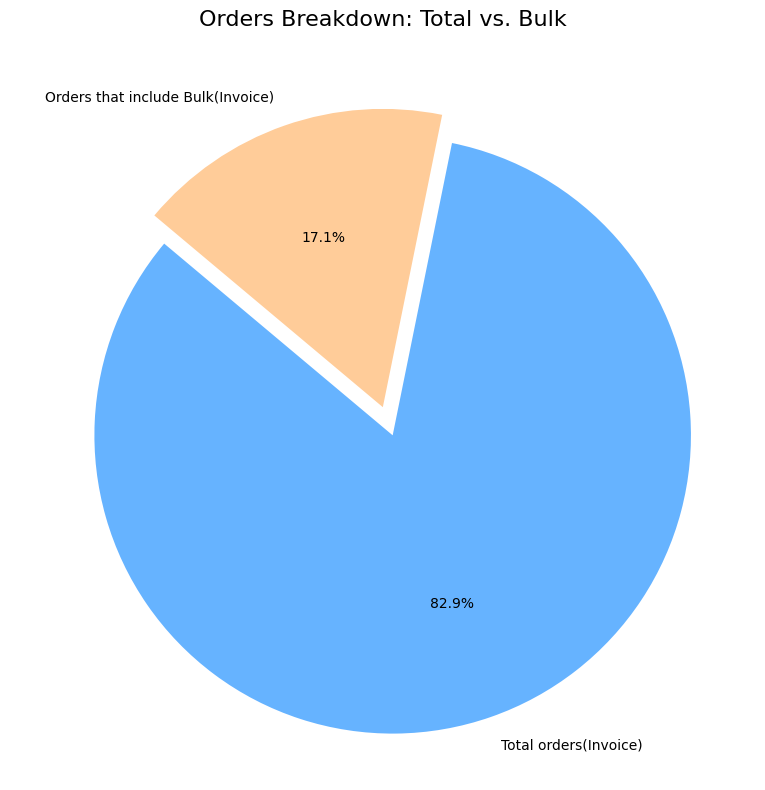

In [22]:
plt.figure(figsize=(8, 8))
plt.pie(
    [total_orders_combined, bulk_icnlude_orders],
    labels=['Total orders(Invoice)', 'Orders that include Bulk(Invoice)'],
    autopct='%1.1f%%', 
    startangle=140,    
    colors=['#66b3ff', '#ffcc99'], 
    explode=(0.1, 0)    
)
plt.title('Orders Breakdown: Total vs. Bulk', fontsize=16)
plt.tight_layout()
plt.savefig("graphs\\Orders Breakdown Total vs Bulk")
plt.show()

In [24]:
#total bulk revenue
df['Revenue'] = df['Quantity'] * df['Price']
bulk_revenue = df['Revenue'].sum()
print(f"Total bulk Revenue: {bulk_revenue:.2f}£")

Total bulk Revenue: 5802651.11£


In [26]:
#bulk revenue contrebution
dfr['Revenue'] = dfr['Quantity'] * dfr['Price']
retail_revenue = dfr['Revenue'].sum()
bulk_prcnt = bulk_revenue/(bulk_revenue+retail_revenue) *100
print(f"Bulk revenue contrebution: {bulk_prcnt:.2f}%")

Bulk revenue contrebution: 28.89%


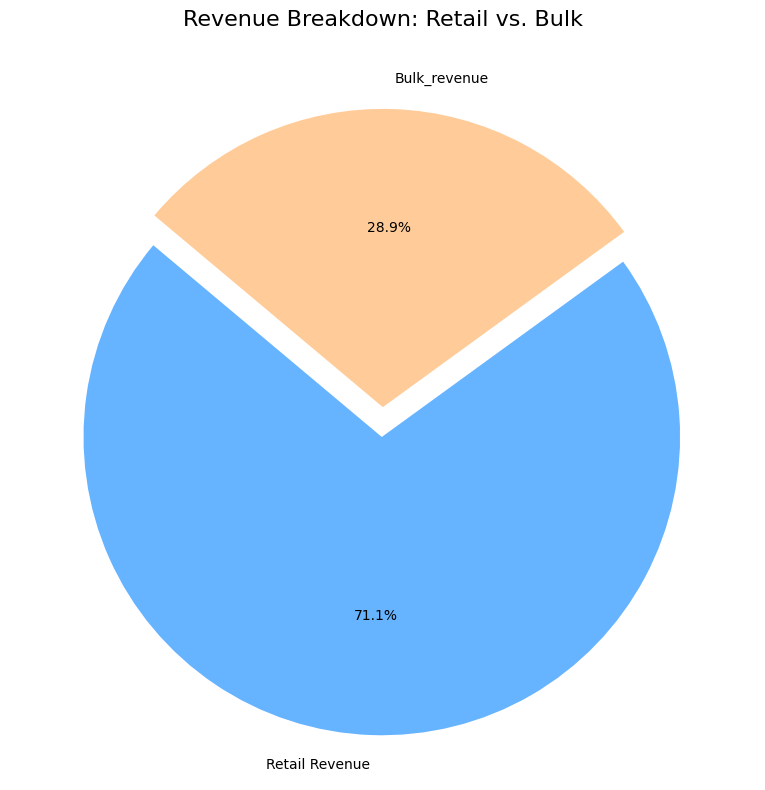

In [28]:
plt.figure(figsize=(8, 8))
plt.pie(
    [retail_revenue, bulk_revenue],
    labels=['Retail Revenue', 'Bulk_revenue'],
    autopct='%1.1f%%', 
    startangle=140,    
    colors=['#66b3ff', '#ffcc99'], 
    explode=(0.1, 0)    
)
plt.title('Revenue Breakdown: Retail vs. Bulk', fontsize=16)
plt.tight_layout()
plt.savefig("graphs\\Revenue Breakdown Retail vs Bulk")
plt.show()

In [30]:
def millions(x, pos):
    return f'{x / 1e6:.1f}M £'

In [44]:
df['Month'] = df['InvoiceDate'].dt.to_period('M')
filtered_df = df[df['Month'] != '2009-12']
filtered_df['Quarter'] = filtered_df['InvoiceDate'].dt.to_period('Q')

C:\Users\user\AppData\Local\Temp\ipykernel_17980\1828123569.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Quarter'] = filtered_df['InvoiceDate'].dt.to_period('Q')


In [46]:
monthly_sales = df.groupby('Month')['Revenue'].sum()
monthly_sales

Month
2009-12    206654.28
2010-01    218018.40
2010-02    155420.62
2010-03    198543.00
2010-04    198031.22
2010-05    178714.71
2010-06    194029.50
2010-07    235680.06
2010-08    277813.00
2010-09    269979.61
2010-10    253101.54
2010-11    392345.91
2010-12    195009.67
2011-01    230981.82
2011-02    135705.54
2011-03    197524.12
2011-04    120695.02
2011-05    195202.55
2011-06    254990.34
2011-07    201302.76
2011-08    221702.03
2011-09    295767.59
2011-10    313087.60
2011-11    378948.03
2011-12    283402.19
Freq: M, Name: Revenue, dtype: float64

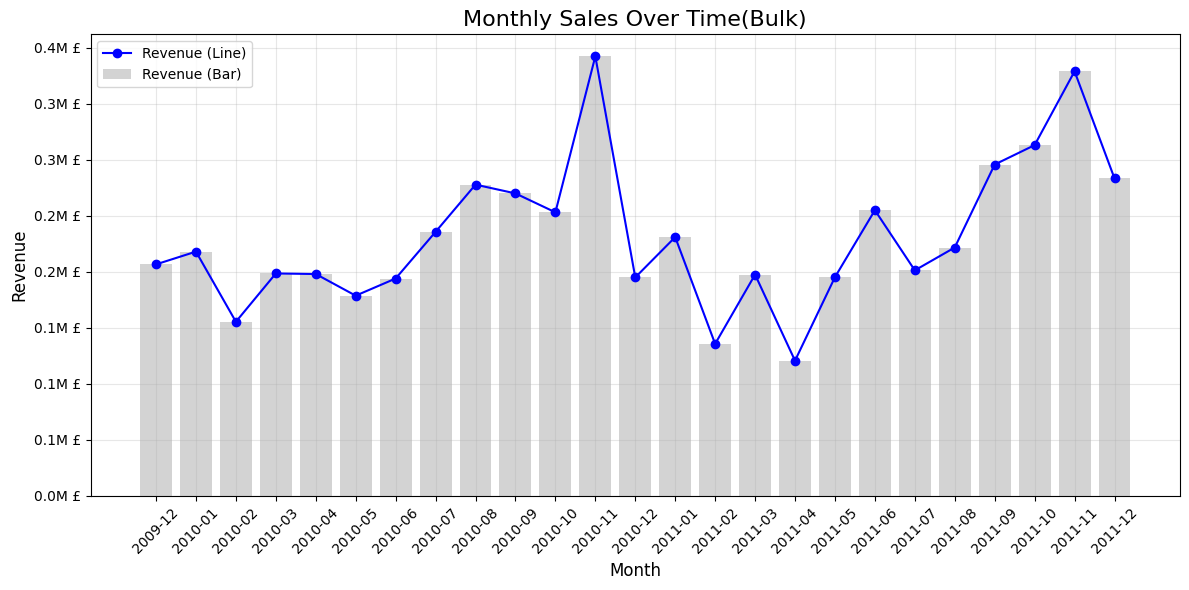

In [48]:
plt.figure(figsize=(12, 6))
plt.bar(monthly_sales.index.astype(str), monthly_sales.values, color='lightgray', label='Revenue (Bar)')
plt.plot(monthly_sales.index.astype(str), monthly_sales.values, marker='o', color='b', label='Revenue (Line)')
plt.title('Monthly Sales Over Time(Bulk)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.legend()
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))
plt.tight_layout()
plt.savefig("graphs\\MoM bulk sales") 
plt.show()

In [50]:
#MoM Sales Growth
monthly_sales_growth = monthly_sales.pct_change() * 100
monthly_sales_growth

Month
2009-12          NaN
2010-01     5.499097
2010-02   -28.712155
2010-03    27.745598
2010-04    -0.257768
2010-05    -9.754275
2010-06     8.569407
2010-07    21.466097
2010-08    17.877176
2010-09    -2.819663
2010-10    -6.251609
2010-11    55.015220
2010-12   -50.296495
2011-01    18.446342
2011-02   -41.248389
2011-03    45.553468
2011-04   -38.896060
2011-05    61.732066
2011-06    30.628591
2011-07   -21.054751
2011-08    10.133627
2011-09    33.407705
2011-10     5.855953
2011-11    21.035784
2011-12   -25.213442
Freq: M, Name: Revenue, dtype: float64

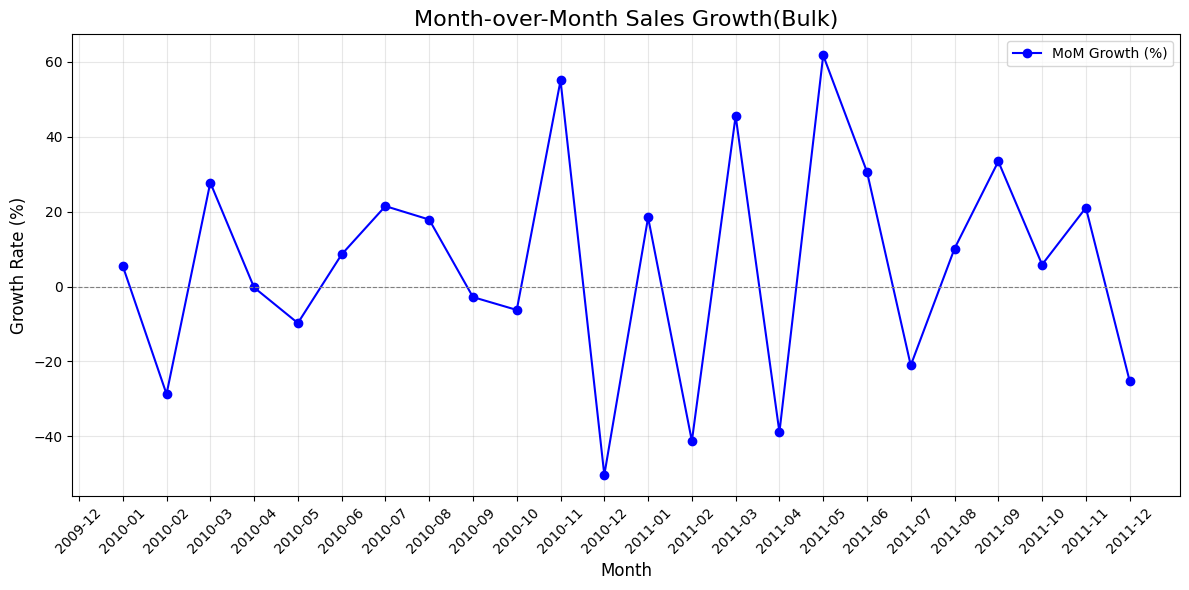

In [52]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales_growth.index.astype(str), monthly_sales_growth.values, 
         marker='o', linestyle='-', color='b', label='MoM Growth (%)')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8) 
plt.title('Month-over-Month Sales Growth(Bulk)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Growth Rate (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig("graphs\\MoM bulk sales growth") 
plt.show()

In [54]:
quarterly_sales = filtered_df.groupby('Quarter')['Revenue'].sum()
quarterly_sales

Quarter
2010Q1    571982.02
2010Q2    570775.43
2010Q3    783472.67
2010Q4    840457.12
2011Q1    564211.48
2011Q2    570887.91
2011Q3    718772.38
2011Q4    975437.82
Freq: Q-DEC, Name: Revenue, dtype: float64

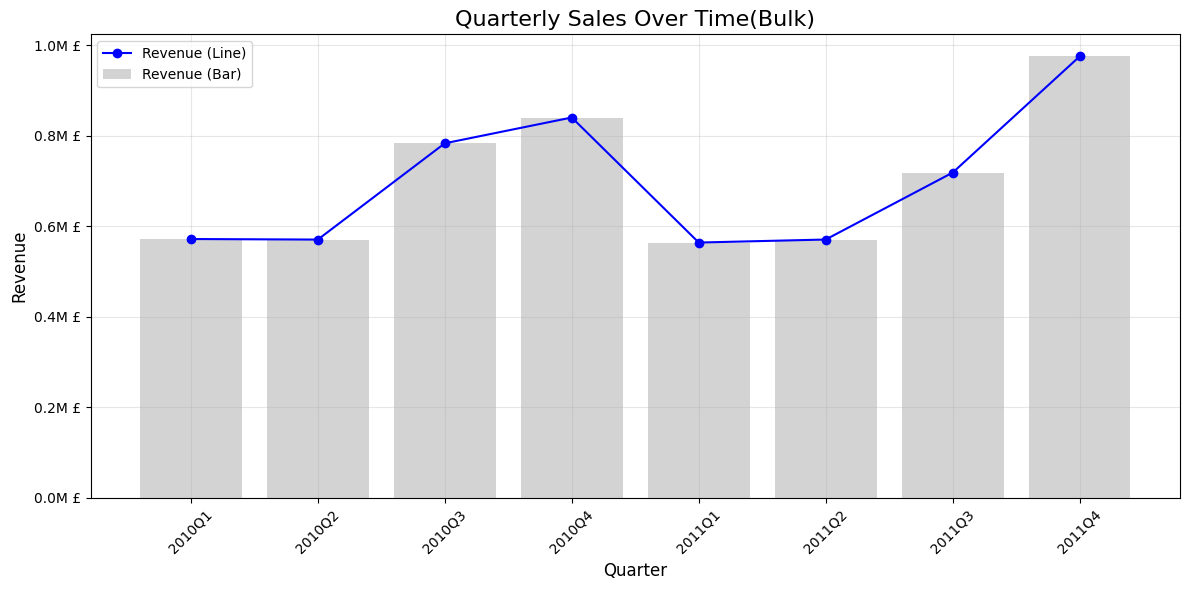

In [56]:
plt.figure(figsize=(12, 6))
plt.bar(quarterly_sales.index.astype(str), quarterly_sales.values, color='lightgray', label='Revenue (Bar)')
plt.plot(quarterly_sales.index.astype(str), quarterly_sales.values, marker='o', color='b', label='Revenue (Line)')
plt.title('Quarterly Sales Over Time(Bulk)', fontsize=16)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))
plt.legend()
plt.tight_layout()
plt.savefig("graphs\\QoQ bulk sales")
plt.show()

In [58]:
#QoQ Sales Growth
quarterly_sales_growth = quarterly_sales.pct_change() * 100
quarterly_sales_growth

Quarter
2010Q1          NaN
2010Q2    -0.210949
2010Q3    37.264610
2010Q4     7.273317
2011Q1   -32.868499
2011Q2     1.183320
2011Q3    25.904292
2011Q4    35.708862
Freq: Q-DEC, Name: Revenue, dtype: float64

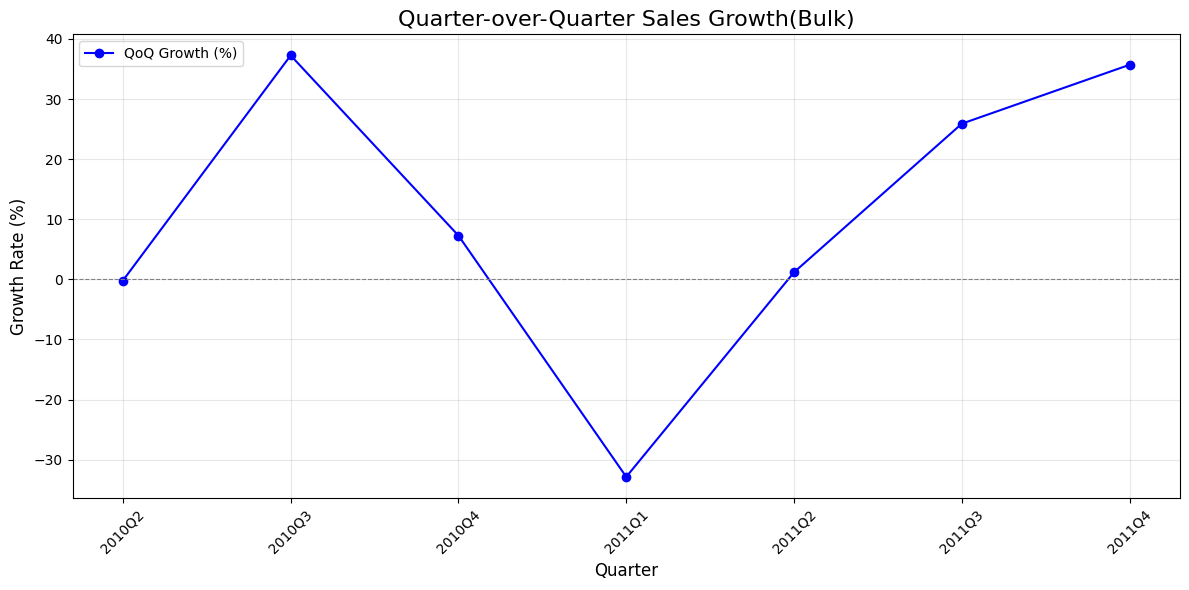

In [60]:
plt.figure(figsize=(12, 6))
plt.plot(quarterly_sales_growth.index.astype(str), quarterly_sales_growth.values, 
         marker='o', linestyle='-', color='b', label='QoQ Growth (%)')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8) 
plt.title('Quarter-over-Quarter Sales Growth(Bulk)', fontsize=16)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Growth Rate (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig("graphs\\QoQ bulk sales growth")
plt.show()

In [62]:
#Average Order Value (bulk)
num_of_orders = df['Invoice'].nunique()
aov = bulk_revenue/num_of_orders
print(f"Average Order Value :{aov:.2f}£")

Average Order Value :682.34£


In [64]:
#Region sales analysis

In [66]:
df['Country'].nunique()

35

In [68]:
sales_region = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False)
sales_region

Country
United Kingdom          4734222.70
Netherlands              424861.02
Ireland                  225339.05
Australia                116667.48
Sweden                    59552.60
France                    54296.68
Denmark                   40438.04
Germany                   38594.23
Spain                     32598.58
Japan                     25024.52
Switzerland               12947.02
Channel Islands            8144.65
Finland                    4569.52
Norway                     4408.30
Hong Kong                  2784.36
Cyprus                     2251.04
Singapore                  1985.86
Thailand                   1956.84
Austria                    1927.00
Belgium                    1712.80
Italy                      1458.84
Portugal                   1239.10
South Africa                990.90
United Arab Emirates        784.60
Israel                      608.40
Canada                      594.72
Bahrain                     587.94
United States               546.00
Bermuda     

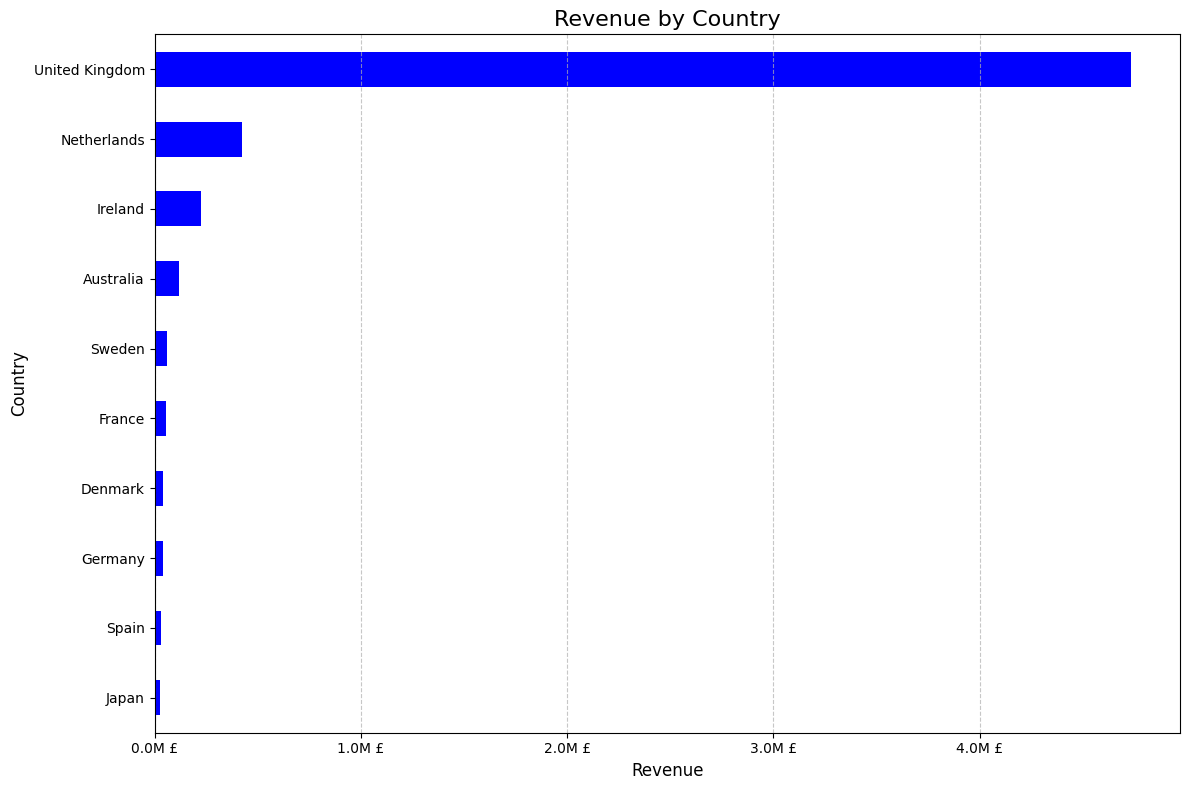

In [70]:
plt.figure(figsize=(12, 8))
sales_region.head(10)[::-1].plot(kind='barh', color='blue')
plt.title('Revenue by Country', fontsize=16)
plt.xlabel('Revenue', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.gca().xaxis.set_major_formatter(FuncFormatter(millions))
plt.savefig("graphs\\Top 10 Revenues by Country(Bulk)")
plt.show()

In [72]:
df['StockCode'].nunique()

2691

In [74]:
top_customers = df.groupby('Customer ID')['Revenue'].sum().sort_values(ascending=False)
top_customers

Customer ID
Unknown    775981.91
18102      547910.06
14646      423203.50
17450      227683.17
14156      197431.89
             ...    
13621           4.00
12635           4.00
14862           4.00
14234           4.00
16669           4.00
Name: Revenue, Length: 1972, dtype: float64

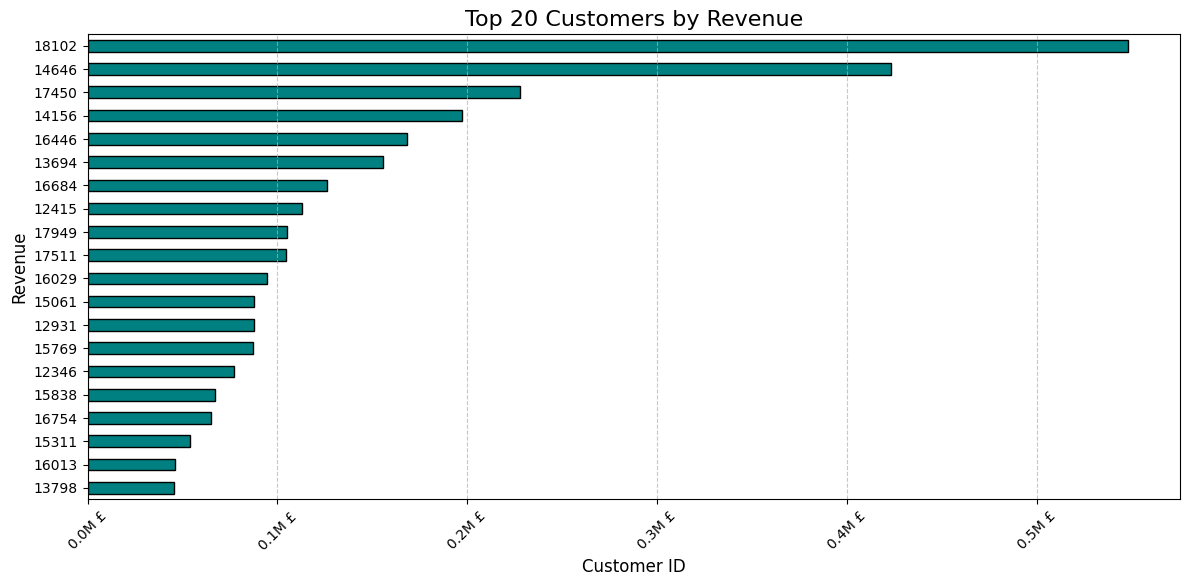

In [76]:
plt.figure(figsize=(12, 6))
top_customers.drop('Unknown').head(20)[::-1].plot(kind='barh', color='teal', edgecolor='black')
plt.title('Top 20 Customers by Revenue', fontsize=16)
plt.xlabel('Customer ID', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.gca().xaxis.set_major_formatter(FuncFormatter(millions))
plt.savefig("graphs\\Top 20 Customers by Revenue(Bulk)")
plt.show()

In [78]:
top_customers_minus_the_top_20 = top_customers.sum() - top_customers.head(20).sum() 

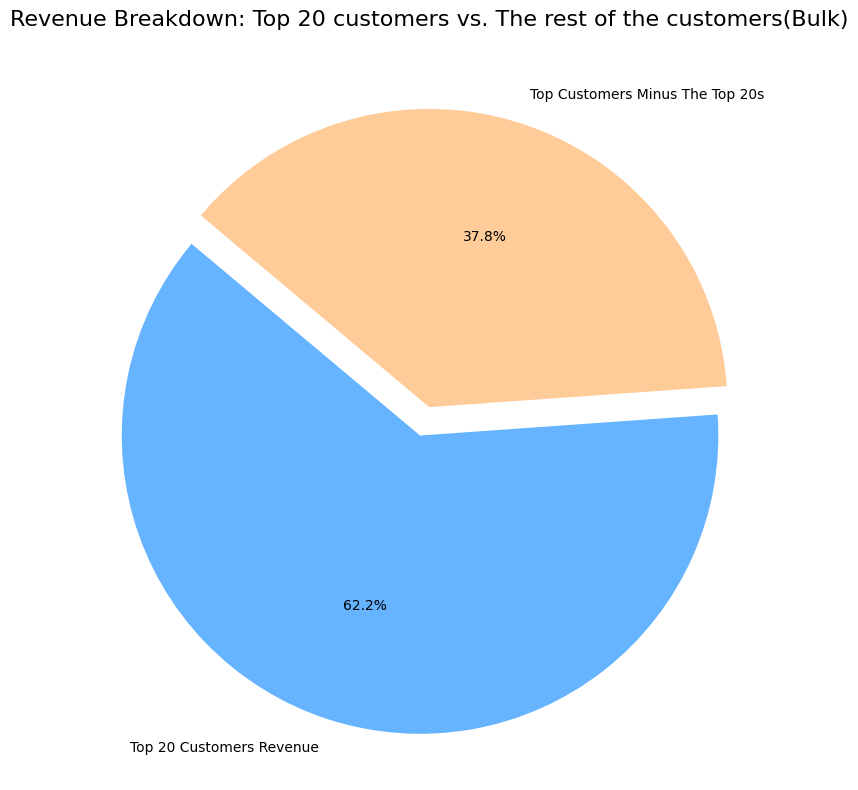

In [80]:
plt.figure(figsize=(8, 8))
plt.pie(
    [top_customers.head(20).sum(), top_customers_minus_the_top_20],
    labels=['Top 20 Customers Revenue', 'Top Customers Minus The Top 20s'],
    autopct='%1.1f%%',  # Display percentages
    startangle=140,     # Rotate for better alignment
    colors=['#66b3ff', '#ffcc99'],  # Optional custom colors
    explode=(0.1, 0)    # Slightly pull out the "Known Customers" slice
)
plt.title('Revenue Breakdown: Top 20 customers vs. The rest of the customers(Bulk)', fontsize=16)
plt.tight_layout()
plt.savefig("graphs\\Revenue Breakdown Top 20 customers vs The rest of the customers(Bulk)")
plt.show()

In [82]:
#top selling bulk products by revenue 
top_products = df.groupby('StockCode')['Revenue'].sum().sort_values(ascending=False)
top_products

StockCode
23843     168469.60
85123A    122415.16
85099B    108749.95
23166      78542.00
22423      69389.59
            ...    
16161G        10.00
17136A         7.68
17061          2.08
49031B         0.00
23001          0.00
Name: Revenue, Length: 2691, dtype: float64

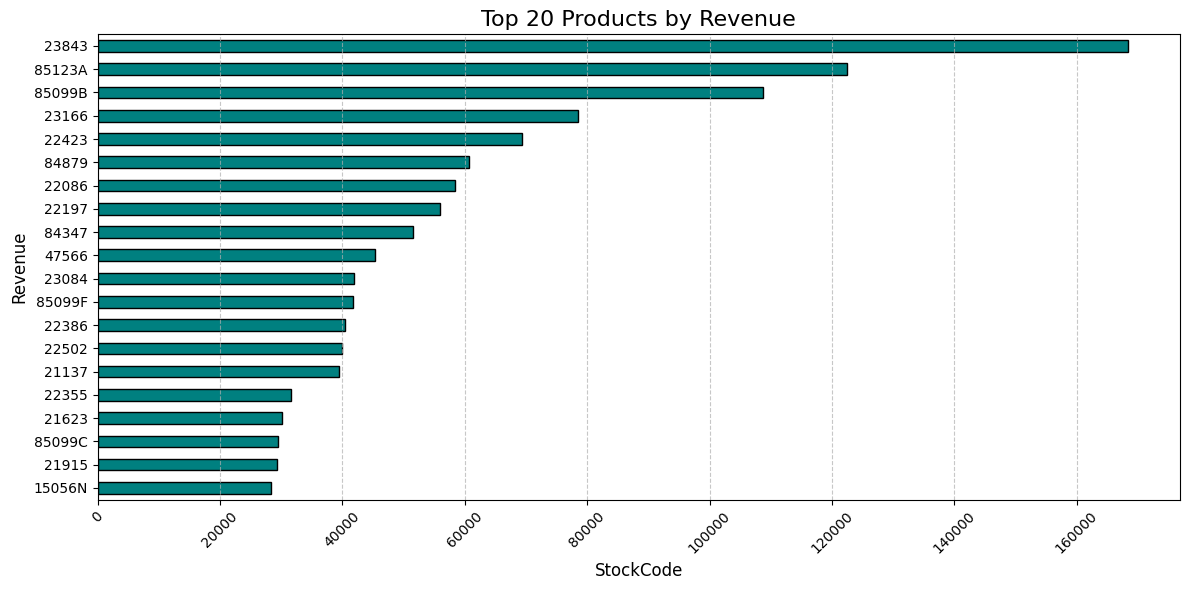

In [84]:
plt.figure(figsize=(12, 6))
top_products.head(20)[::-1].plot(kind='barh', color='teal', edgecolor='black')
plt.title('Top 20 Products by Revenue', fontsize=16)
plt.xlabel('StockCode', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("graphs\\Top 20 Products by Revnue(Bulk)")
plt.show()

In [86]:
#top selling bulk products by revenue 
top_products_qte = df.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False)
top_products_qte.head(20)

StockCode
23843     80995
23166     75463
84077     72624
22197     64473
85099B    63235
17003     58862
21212     50310
85123A    46192
84879     40609
84568     34438
15036     31525
21977     30708
16014     28580
22616     27965
84991     26472
21915     26027
37410     25524
84347     24957
22492     24915
85099F    24146
Name: Quantity, dtype: int64

In [88]:
revenu_of_top_20_products = top_products.head(20).sum()
products_revenue_minus_top_20 = top_products.sum() - revenu_of_top_20_products

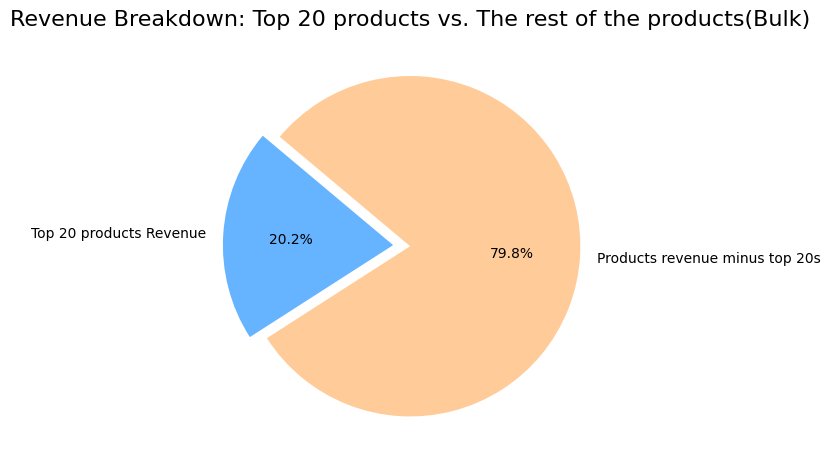

In [90]:
plt.figure(figsize=(8, 8))
plt.pie(
    [revenu_of_top_20_products, products_revenue_minus_top_20],
    labels=['Top 20 products Revenue', 'Products revenue minus top 20s'],
    autopct='%1.1f%%', 
    startangle=140,     
    colors=['#66b3ff', '#ffcc99'], 
    explode=(0.1, 0)  
)
plt.title('Revenue Breakdown: Top 20 products vs. The rest of the products(Bulk)', fontsize=16)
plt.tight_layout()
plt.savefig("graphs\\Revenue Breakdown Top 20 products vs The rest of the products(Bulk)")
plt.show()

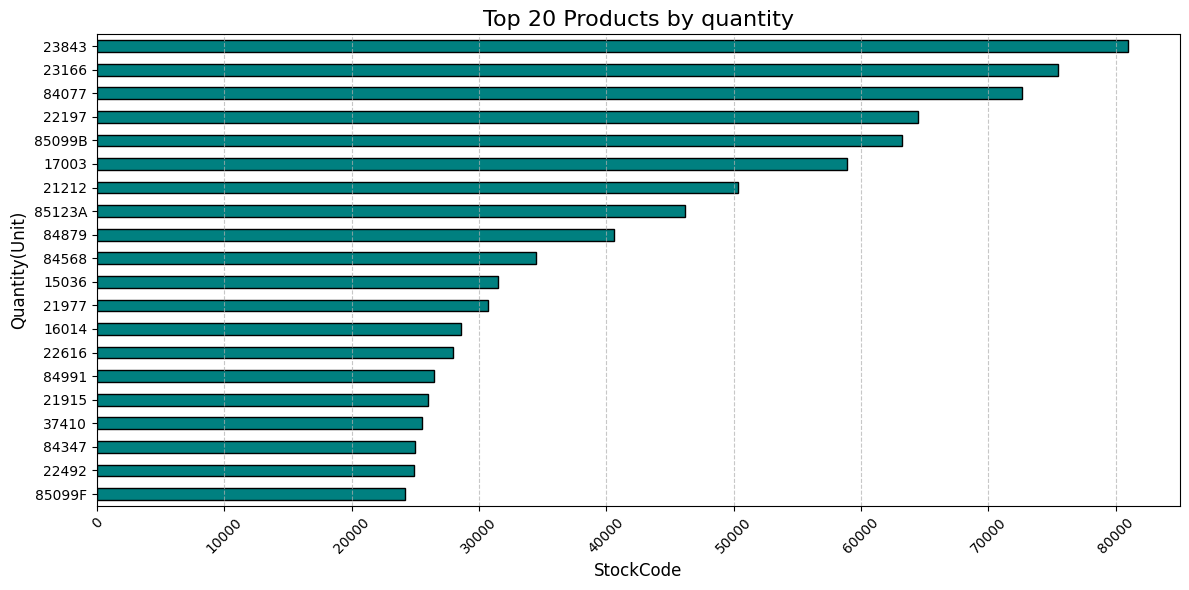

In [92]:
plt.figure(figsize=(12, 6))
top_products_qte.head(20)[::-1].plot(kind='barh', color='teal', edgecolor='black')
plt.title('Top 20 Products by quantity', fontsize=16)
plt.xlabel('StockCode', fontsize=12)
plt.ylabel('Quantity(Unit)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [94]:
num_orders_unknown_customer = len(df[df['Customer ID'] == 'Unknown'].groupby('Invoice').size())
num_orders_unknown_customer 

696

In [96]:
num_transactions_unknown_customer = df[df['Customer ID'] == 'Unknown'].shape[0]
num_transactions_unknown_customer                                       

1337

In [102]:
len(df)

24350

In [104]:
#avrage bulk sales item quantity
avg_bulk_qte = df['Quantity'].mean()
print(f"Avrage Bulk transactions item quantity:{avg_bulk_qte:.2f} item")

Avrage Bulk transactions item quantity:188.86 item


In [106]:
#purchase frequency for bulk orders(bulk)
num_of_customers = df['Customer ID'].nunique()
pf = num_of_orders / num_of_customers
print(f"Purchase frequency for bulk: {pf:.2f}")

Purchase frequency for bulk: 4.31


In [108]:
#Customer lifespan(bulk)
customer_lifespan = df.groupby('Customer ID').agg(
    first_purchase=('InvoiceDate', 'min'),
    last_purchase=('InvoiceDate', 'max')
)
customer_lifespan['lifespan_years'] = (customer_lifespan['last_purchase'] - customer_lifespan['first_purchase']).dt.days / 365
l = customer_lifespan['lifespan_years'].mean()
l

0.47744866486982135

In [110]:
#Customer life value(bulk)
clv = aov*pf*l
print(f"Customer life value: {clv:.2f}£")

Customer life value: 1404.90£


In [112]:
customer_months = df.groupby(['Customer ID', 'Month'])['Invoice'].nunique().unstack(fill_value=0)
customer_months

Month,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,...,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12
Customer ID,,,,,,,,,,,,,,,,,,,,,
12346,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12347,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
12348,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
12355,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
12356,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18279,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
18285,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [114]:
active_previous_month = customer_months.shift(axis=1, fill_value=0)
active_previous_month = (active_previous_month >= 1) 
churned_customers = (active_previous_month >= 1) & (customer_months == 0)
churned_per_month = churned_customers.sum(axis=0)
active_previous_month_count = active_previous_month.sum(axis=0)

In [116]:
#churn rate(bulk)
churn_rateM = (churned_per_month / active_previous_month_count)*100
print(f"churn rate by month: {churn_rateM}")

churn rate by month: Month
2009-12          NaN
2010-01    76.569038
2010-02    61.971831
2010-03    63.473054
2010-04    69.058296
2010-05    70.098039
2010-06    70.370370
2010-07    68.831169
2010-08    68.115942
2010-09    68.778281
2010-10    69.144981
2010-11    66.229508
2010-12    75.218659
2011-01    66.666667
2011-02    69.375000
2011-03    64.748201
2011-04    74.331551
2011-05    64.071856
2011-06    61.290323
2011-07    65.740741
2011-08    68.376068
2011-09    65.437788
2011-10    70.945946
2011-11    68.106312
2011-12    82.758621
Freq: M, dtype: float64


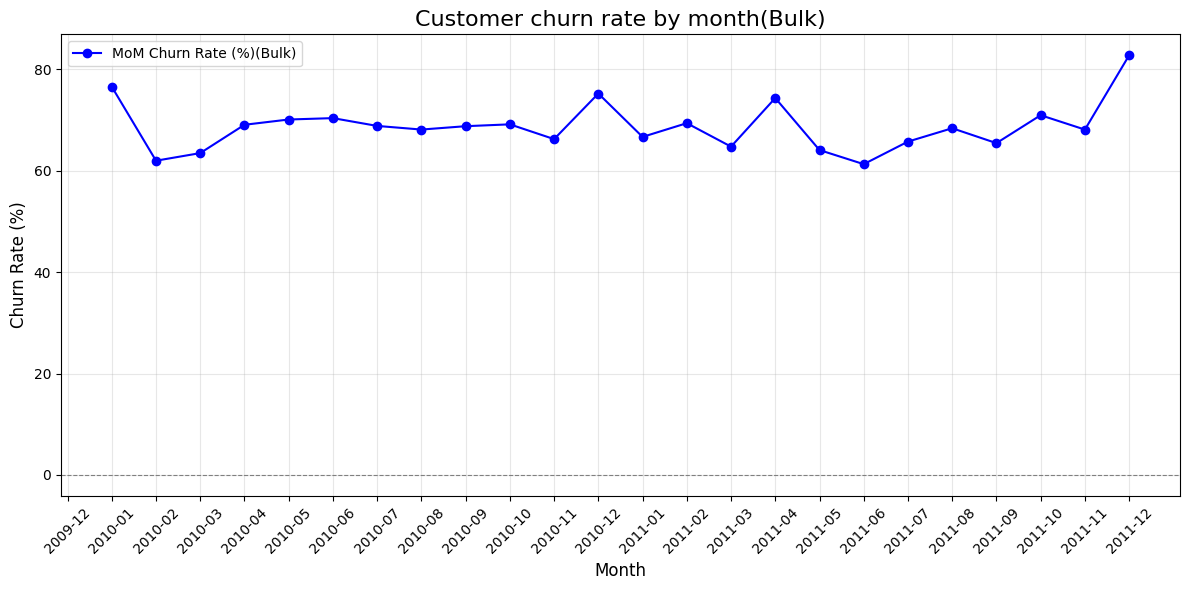

In [118]:
plt.figure(figsize=(12, 6))
plt.plot(churn_rateM.index.astype(str), churn_rateM.values, 
         marker='o', linestyle='-', color='b', label='MoM Churn Rate (%)(Bulk)')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8) 
plt.title('Customer churn rate by month(Bulk)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Churn Rate (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [120]:
customer_quarters = filtered_df.groupby(['Customer ID', 'Quarter'])['Invoice'].nunique().unstack(fill_value=0)
customer_quarters

Quarter,2010Q1,2010Q2,2010Q3,2010Q4,2011Q1,2011Q2,2011Q3,2011Q4
Customer ID,,,,,,,,
12346,0,0,0,0,1,0,0,0
12347,0,0,0,0,0,1,0,0
12348,0,0,0,1,1,1,1,0
12355,0,0,0,0,0,1,0,0
12356,0,0,0,2,1,1,0,0
...,...,...,...,...,...,...,...,...
18273,0,1,0,0,0,0,0,0
18279,0,0,1,0,0,0,0,0
18285,1,0,0,0,0,0,0,0


In [122]:
active_previous_quarter = customer_quarters.shift(axis=1, fill_value=0)
active_previous_quarter = (active_previous_quarter >= 1) 
churned_customers = (active_previous_quarter >= 1) & (customer_quarters == 0)
churned_per_quarter = churned_customers.sum(axis=0)
active_previous_quarter_count = active_previous_quarter.sum(axis=0)

In [124]:
#churn rate by quarter(bulk)
churn_rateQ = (churned_per_quarter / active_previous_quarter_count)*100
print(f"churn rate by quarter: {churn_rateQ}")

churn rate by quarter: Quarter
2010Q1          NaN
2010Q2    49.746193
2010Q3    53.923541
2010Q4    58.490566
2011Q1    69.706840
2011Q2    52.588556
2011Q3    51.700680
2011Q4    58.110517
Freq: Q-DEC, dtype: float64


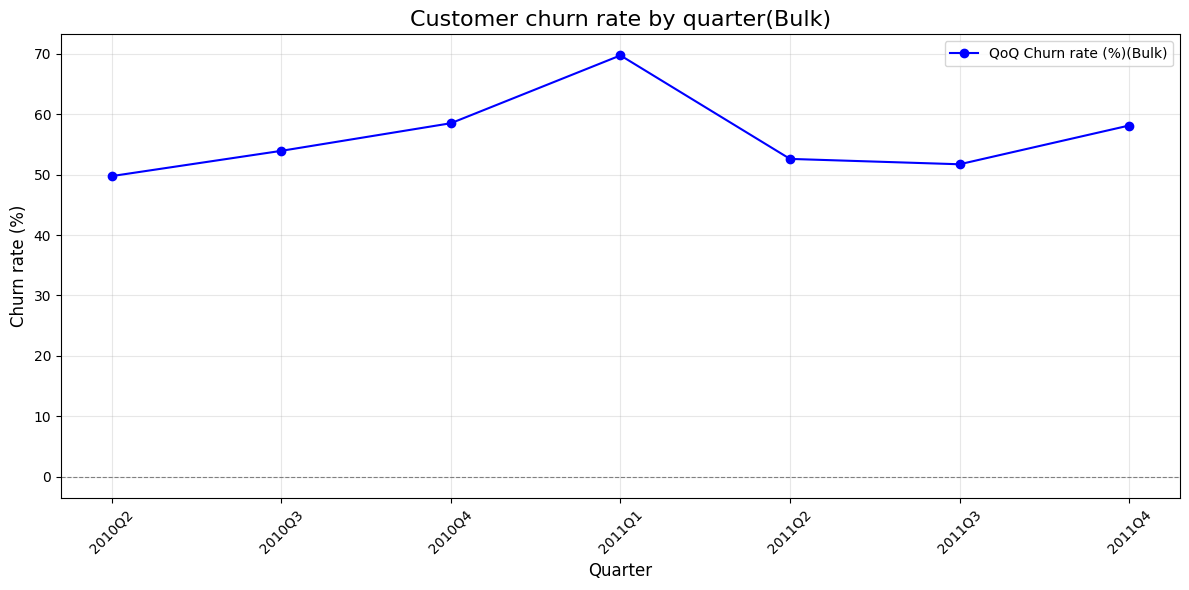

In [126]:
plt.figure(figsize=(12, 6))
plt.plot(churn_rateQ.index.astype(str), churn_rateQ.values, 
         marker='o', linestyle='-', color='b', label='QoQ Churn rate (%)(Bulk)')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8) 
plt.title('Customer churn rate by quarter(Bulk)', fontsize=16)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Churn rate (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [128]:
#Customer retention rate by month(Bulk)
ccrM = 100 - churn_rateM
print(f"Customer retention rate by month(Bulk): {ccrM}%")

Customer retention rate by month(Bulk): Month
2009-12          NaN
2010-01    23.430962
2010-02    38.028169
2010-03    36.526946
2010-04    30.941704
2010-05    29.901961
2010-06    29.629630
2010-07    31.168831
2010-08    31.884058
2010-09    31.221719
2010-10    30.855019
2010-11    33.770492
2010-12    24.781341
2011-01    33.333333
2011-02    30.625000
2011-03    35.251799
2011-04    25.668449
2011-05    35.928144
2011-06    38.709677
2011-07    34.259259
2011-08    31.623932
2011-09    34.562212
2011-10    29.054054
2011-11    31.893688
2011-12    17.241379
Freq: M, dtype: float64%


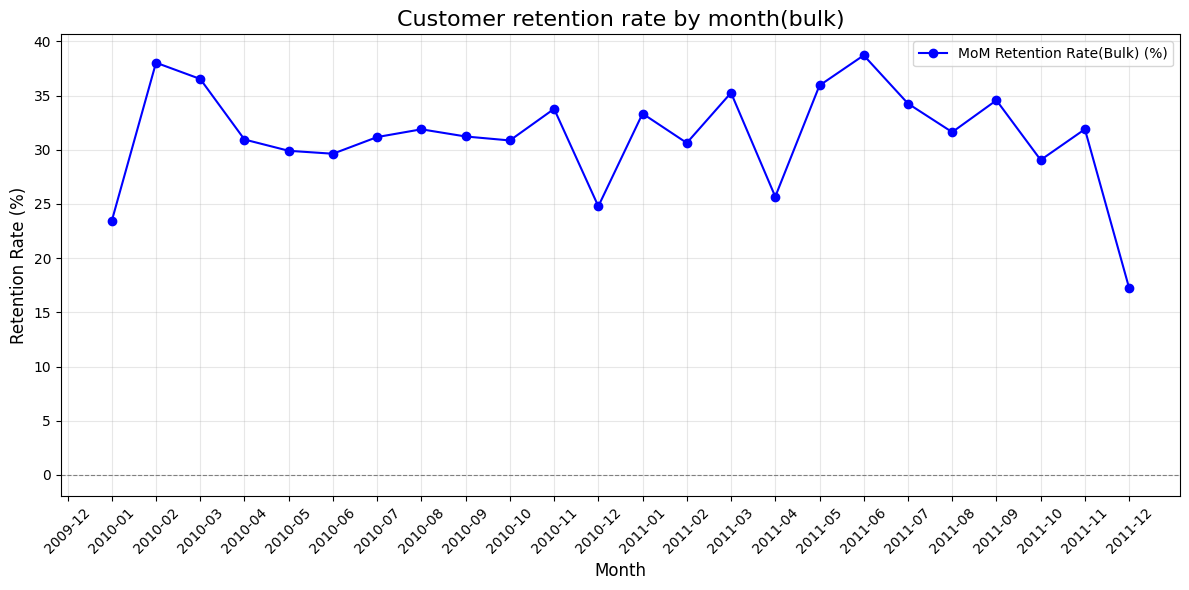

In [130]:
plt.figure(figsize=(12, 6))
plt.plot(ccrM.index.astype(str), ccrM.values, 
         marker='o', linestyle='-', color='b', label='MoM Retention Rate(Bulk) (%)')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8) 
plt.title('Customer retention rate by month(bulk)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Retention Rate (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [132]:
#Customer retention rate by quarter
ccrQ = 100 - churn_rateQ
print(f"Customer retention rate by quarter: {ccrQ}%")

Customer retention rate by quarter: Quarter
2010Q1          NaN
2010Q2    50.253807
2010Q3    46.076459
2010Q4    41.509434
2011Q1    30.293160
2011Q2    47.411444
2011Q3    48.299320
2011Q4    41.889483
Freq: Q-DEC, dtype: float64%


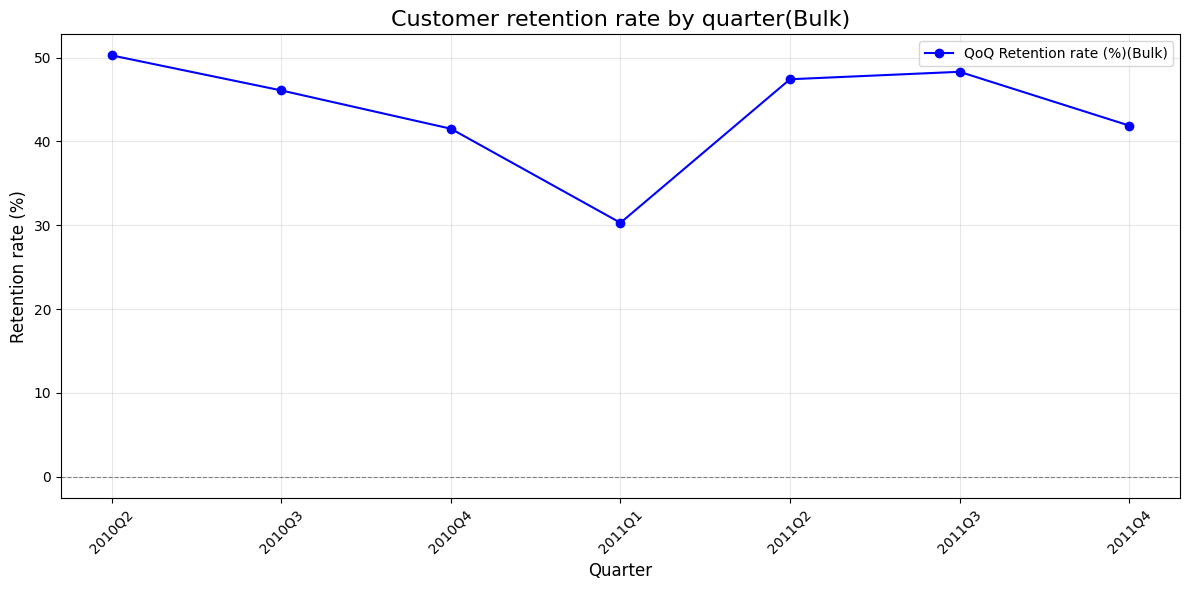

In [134]:
plt.figure(figsize=(12, 6))
plt.plot(ccrQ.index.astype(str), ccrQ.values, 
         marker='o', linestyle='-', color='b', label='QoQ Retention rate (%)(Bulk)')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8) 
plt.title('Customer retention rate by quarter(Bulk)', fontsize=16)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Retention rate (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

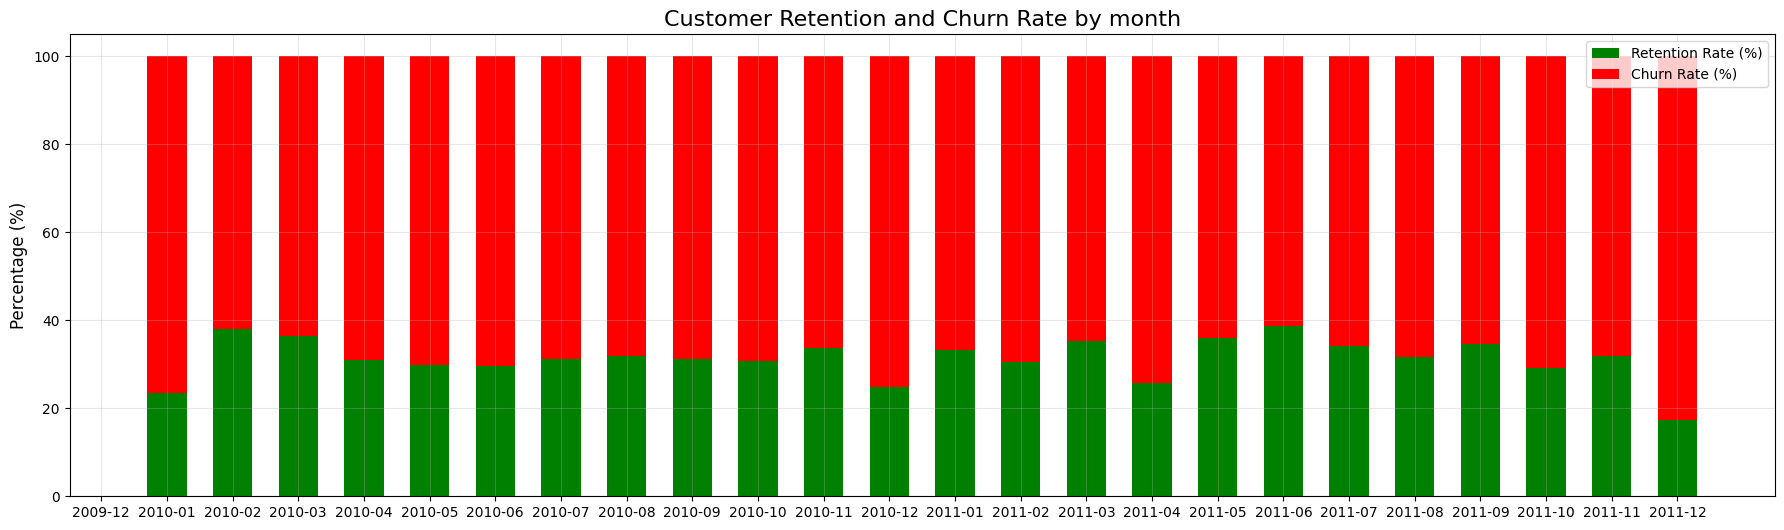

In [136]:
plt.figure(figsize=(22, 6))
bar_width = 0.6
plt.bar(ccrM.index.astype(str), ccrM, color='green', label='Retention Rate (%)', width=bar_width)
plt.bar(churn_rateM.index.astype(str), churn_rateM, bottom=ccrM, color='red', label='Churn Rate (%)', width=bar_width)
plt.title('Customer Retention and Churn Rate by month', fontsize=16)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(loc='upper right')
plt.grid(alpha=0.3)
#plt.tight_layout()
plt.savefig("graphs\\Customer Retention and Churn Rate by month(Bulk)")
plt.show()

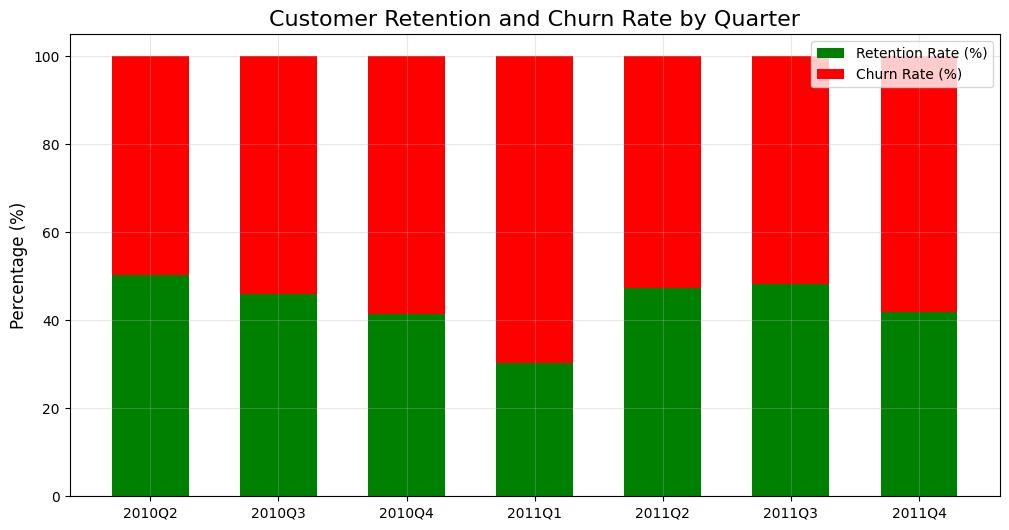

In [138]:
plt.figure(figsize=(12, 6))
bar_width = 0.6
plt.bar(ccrQ.index.astype(str), ccrQ, color='green', label='Retention Rate (%)', width=bar_width)
plt.bar(churn_rateQ.index.astype(str), churn_rateQ, bottom=ccrQ, color='red', label='Churn Rate (%)', width=bar_width)
plt.title('Customer Retention and Churn Rate by Quarter', fontsize=16)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(loc='upper right')
plt.grid(alpha=0.3)
#plt.tight_layout()
plt.savefig("graphs\\Customer Retention and Churn Rate by Quarter(Bulk)")
plt.show()